In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense,LSTM,GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.model_selection import train_test_split

In [8]:
data=pd.read_csv("D:\\Source_code\\Lab\\data\\IMDB Dataset.csv")
print(data.head())

X=data['review']
Y=data['sentiment'].map({'positive':1,'negative':0})

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

tokenizer=Tokenizer(num_words=10000,oov_token='<oov>')
tokenizer.fit_on_texts(xtrain)

xtrain=pad_sequences(tokenizer.texts_to_sequences(xtrain),maxlen=200)
xtest=pad_sequences(tokenizer.texts_to_sequences(xtest),maxlen=200)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [9]:
logs={}

model1=Sequential([
    Embedding(10000,32),
    SimpleRNN(32,activation='relu'),
    Dense(1,activation='relu')
])
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model2=Sequential([
    Embedding(10000,32),
    GRU(32,activation='relu'),
    Dense(1,activation='relu')
])
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model3=Sequential([
    Embedding(10000,32),
    LSTM(32,activation='relu'),
    Dense(1,activation='relu')
])
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [10]:


logs['rnn']=model1.fit(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest),batch_size=64)

logs['gru']=model2.fit(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest),batch_size=64)

logs['lstm']=model3.fit(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest),batch_size=64)

Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.6571 - loss: 0.7815 - val_accuracy: 0.8110 - val_loss: 0.4800
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.6835 - loss: 0.5931 - val_accuracy: 0.7101 - val_loss: 0.5745
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8398 - loss: 0.4110 - val_accuracy: 0.8434 - val_loss: 0.4459
Epoch 4/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.8816 - loss: 0.3315 - val_accuracy: 0.8253 - val_loss: 0.5873
Epoch 5/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.8745 - loss: 0.3345 - val_accuracy: 0.7481 - val_loss: 0.6041
Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.5783 - loss: 3.8789 - val_accuracy: 0.5331 - val_loss: 3.3542
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - accuracy: 0.6758 - loss: 0.6348 - val_accuracy: 0.7190 - val_loss: 0.5647
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - accuracy: 0.7126 - loss: 1.5575 - val_accu

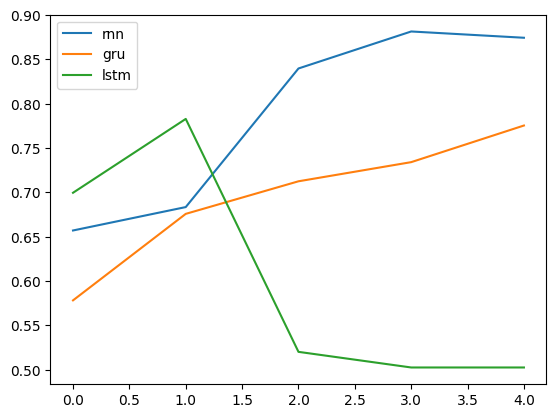

In [11]:
for name in logs:
    plt.plot(logs[name].history['accuracy'],label=name)
plt.legend()
plt.show()